# Employee Turn Over Prediction

## Business Case : The turnover prediction rate estimates employees that might leave the company in the future. 

## Introduction

### What is Employee Turnover?
* Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

## OBJECTIVE OF PROJECT:

* Employee Turnover Prediction project is to construct an accurate predictive model that anticipates employee attrition. By analyzing historical employee data, encompassing job satisfaction, salary, work environment, and performance metrics, the model aims to identify employees at risk of leaving the organization. The objective is to provide actionable insights to Human Resources for implementing targeted retention strategies. This involves data preprocessing, feature engineering, and leveraging machine learning to build a robust predictive model, ultimately aiding organizations in reducing turnover rates and enhancing workplace productivity.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the data


* Here we are loading our data in a CSV (Comma-Separated Values) format. In a CSV file, each line represents a row of data, and within each line, columns are separated by commas 

In [2]:
data=pd.read_csv('Employee turnover prediction.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.shape

(14999, 10)

In [6]:
duplicates = data.duplicated(keep='first')
duplicate_count = sum(duplicates)
duplicate_count                                  # we can also use data.duplicated().sum()

3008

In [7]:
data.drop_duplicates(inplace=True)


In [8]:
data.shape

(11991, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
data.describe(include=['O'])

,Department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


## Domain Analysis

###### Satisfaction Level:
* This usually refers to an employee's reported satisfaction with their job or work environment. It can be measured through surveys, ratings, or feedback mechanisms. High satisfaction levels might correlate with lower turnover rates.

###### Last Evaluation:
* Indicates the time since the employee's last performance evaluation. It could represent how recent or outdated the evaluation is, which might impact an employee's motivation or perception of their career growth within the company.

###### Number of Projects:
* The count of projects an employee is involved in simultaneously or over a specific period. This could relate to workload, time management, and stress levels. High or low numbers might impact employee satisfaction and retention differently.Here in our data we are having min as 2 and max as 7 number of projects.

###### Average Monthly Hours:
* The average number of hours an employee works per month. This could reflect workload, overtime, or dedication to tasks. Extreme values might indicate potential burnout or underutilization.

###### Time Spent in the Company:
* Represents the duration an employee has been with the company. Longer tenures might imply loyalty or familiarity with the company culture, while shorter ones might indicate higher turnover risks.

###### Work Accident:
* A binary indicator (1/0) that denotes whether the employee has had a work accident. It could relate to safety concerns or work environment conditions.

###### Left:
* This variable is typically the target or label in a predictive model, indicating whether an employee has left the company (1/0). It's used for classification tasks to predict attrition.

###### Promotion in the Last 5 Years:
* A binary indicator (1/0) denoting whether the employee received a promotion in the last five years. Lack of promotions might affect motivation and career growth, impacting turnover rates.

###### Department:
* Represents the department or division within the company where the employee works. It could capture department-specific trends in turnover or satisfaction levels.In the Department feature we can find multiple featues like Sales,Hr etc.

###### Salary :
* This salary reperents what the level of salary that the employees are getting ,in our data we are having three level salaries like Low, Medium , high .

### Exploratory data analysis
*  The goal of EDA is to understand the data's structure, patterns, distributions, and relationships between variables, all to gain insights and generate hypotheses that can guide further investigation or modeling

In [12]:
# Univariate analysis

In [13]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Insights from Univariate analysis
* satisfaction_level  :  We are having 14% of highest satisfaction_level and the lowest is 3%

* last_evaluation  : The time since the employee's last performance evaluation we are having highly 14 % of evaluation
* number_project : The count of projects an employee is involved in simultaneously or over a specific period 50% of employees are completed 4 projects.

* average_montly_hours : The average number of hours an employee works per month , here 18% of Employees work for 150 hours in a month.

* time_spend_company : The duration has employee has been in a company , 43 % of employees spend high time in company .

* Work_accident : This could indicates that an employee had an work_accident or not, here we are having less work_accident.

* left : This left tells that a employee left the company or not ,83% of employees are not leaving the company and 17% employee are leaving the company

* promotion_last_5years : This tells an employee got promotion in last 5 years, for our data we can see that 98% of employees are not got any promotion in last 5 years .

* Department : this tell that the employee within the company are related to which department, highest of 27% are related to sales department , technical 19% , support 15% , IT 8%, RandD ,product_mng ,marketing with 6%, accounting and hr as 5% and last 4% of employees are related to management.

* salary : This salary feature has three levels , in this maximum employess (48%) are getting low salary , 44% employees are getting medium salary and finally very less employees are getting high salary.

In [14]:
# bivariate Analysis

In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Checking all the relation between all variables with respect to the the target variable
data1=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]

In [17]:
data.left.unique()

array([1, 0], dtype=int64)

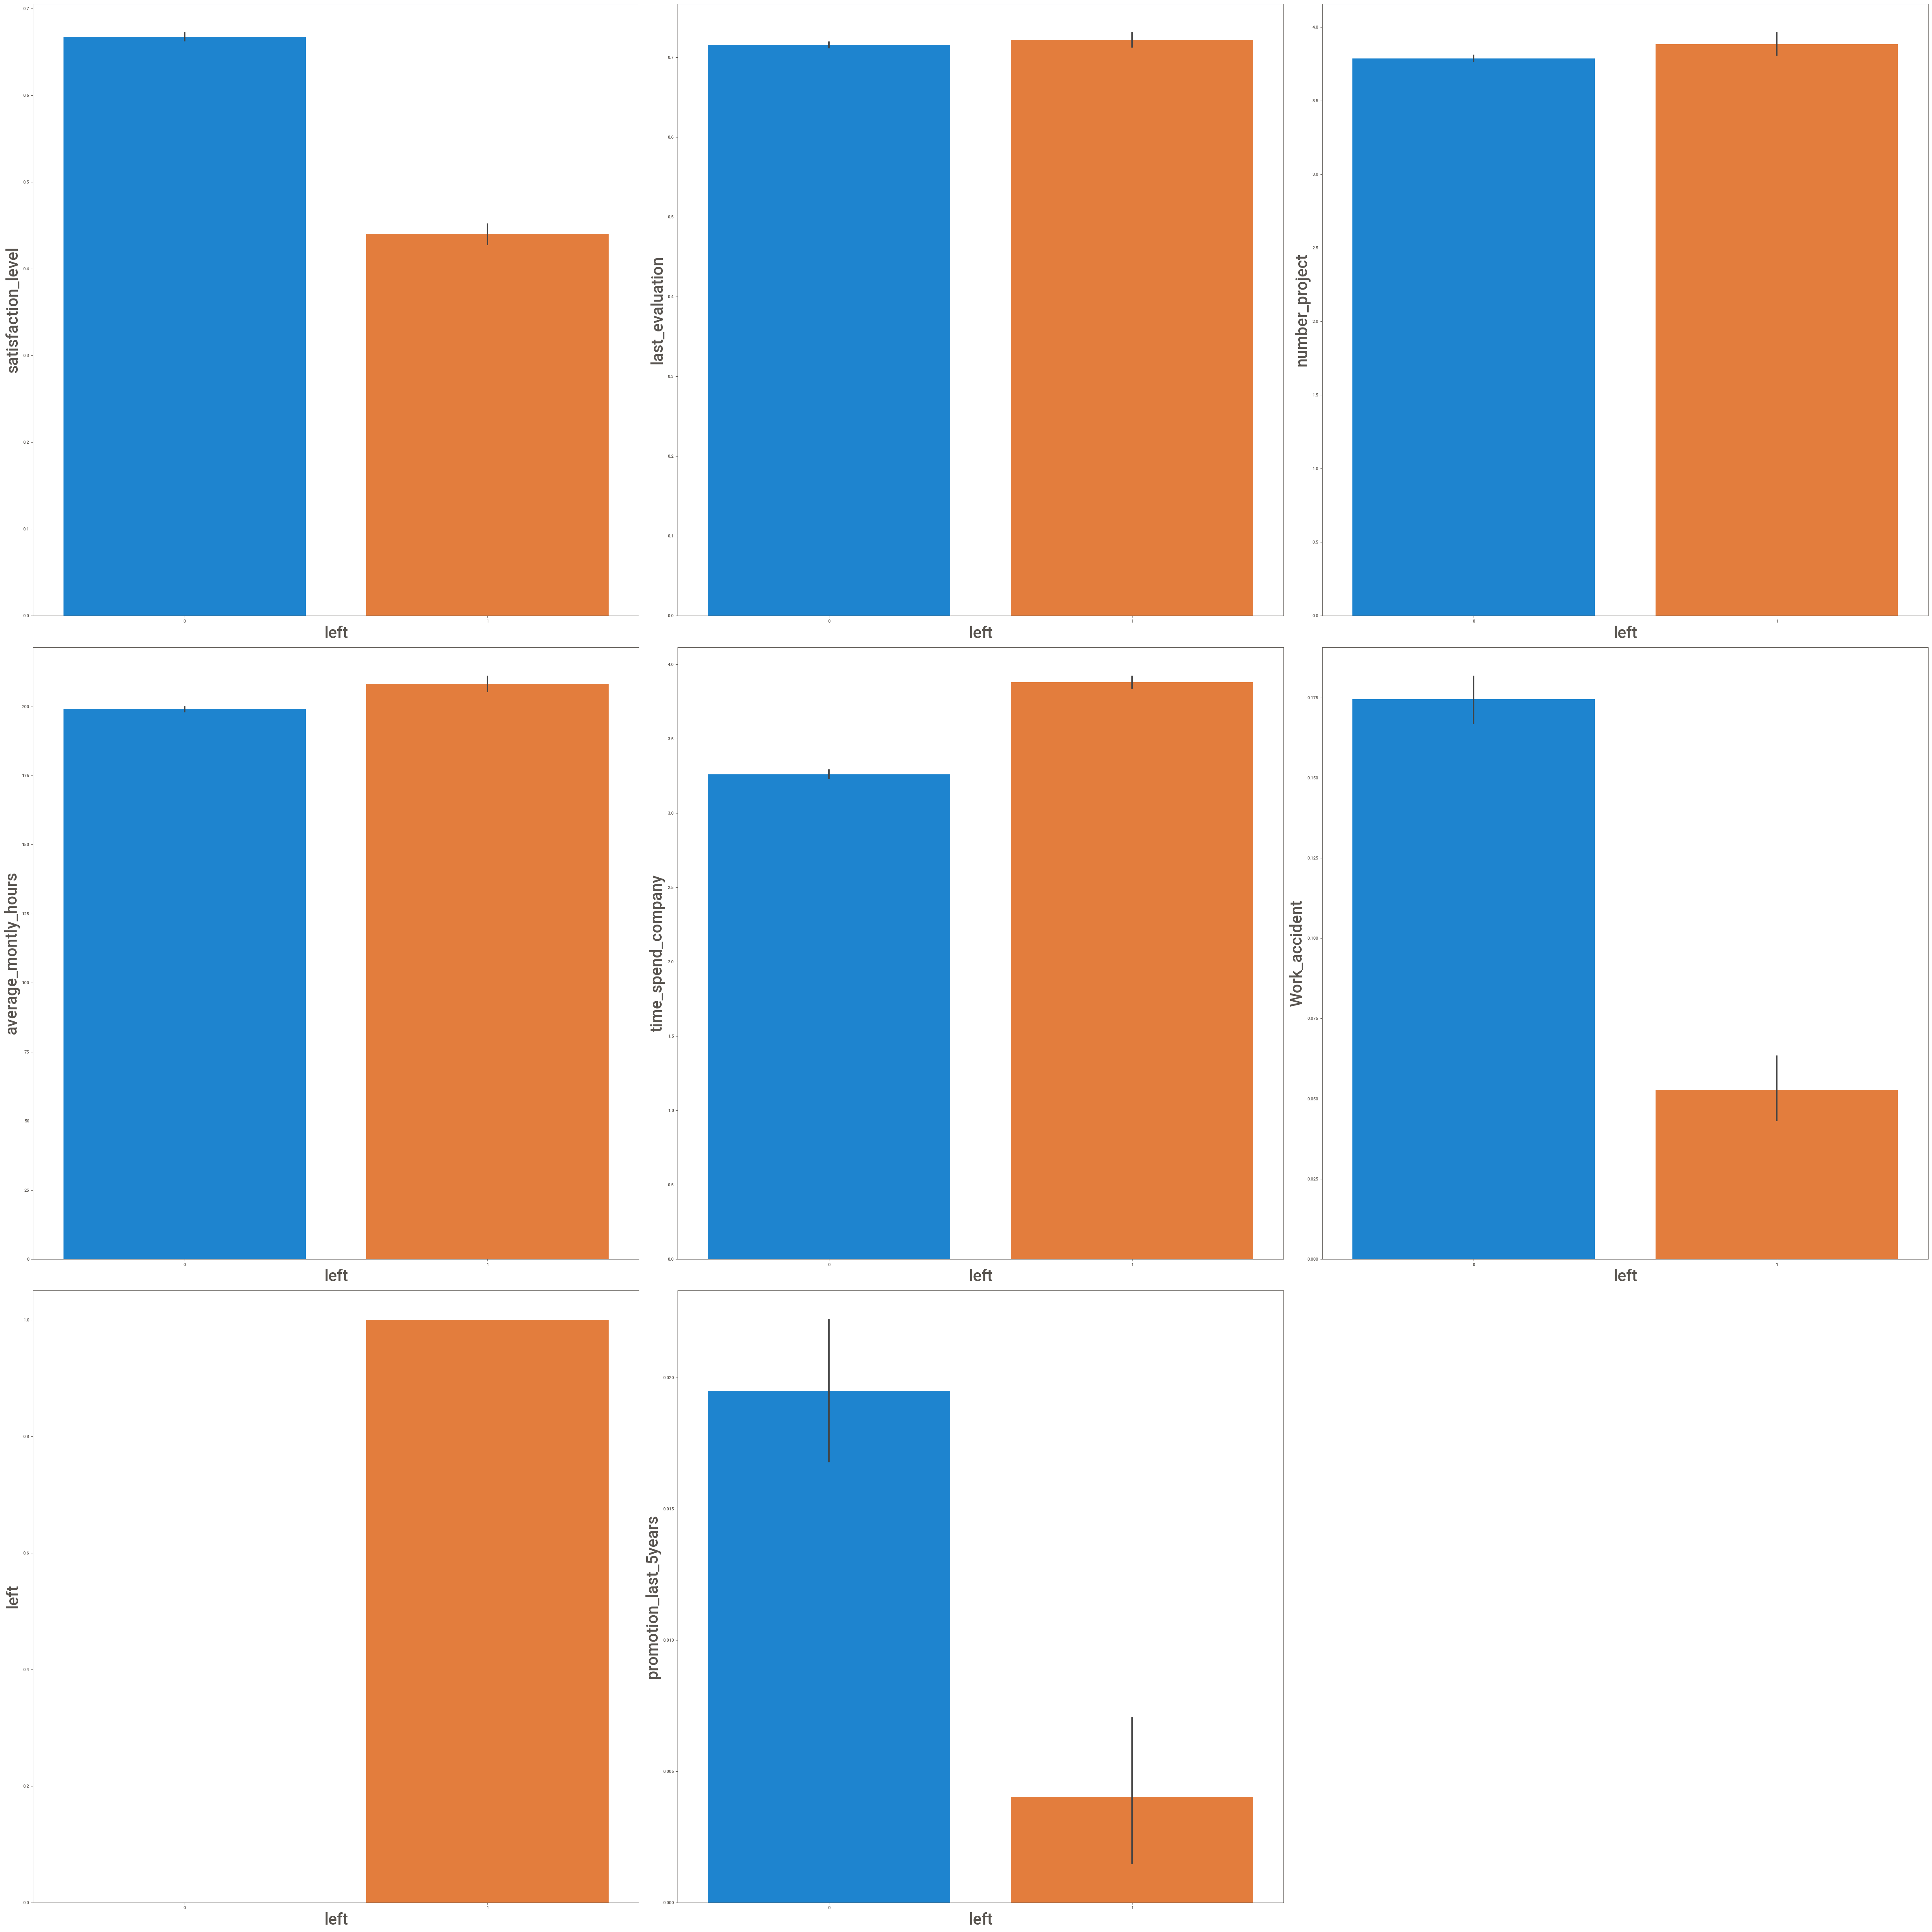

In [18]:
# Plotting how every  categorical feature correlate with the "target"



plt.figure(figsize=(50,50),facecolor='white')
plotnum=1
for column in data1:
    plt.subplot(3,3,plotnum)
    sns.barplot(x=data.left,y=data[column])
    plt.xlabel('left',fontsize=30)
    plt.ylabel(column,fontsize=30)

    
    
        
    plotnum+=1
plt.tight_layout()



### Insights for Bivariate Analysis for Numerical data

#### Satisfaction_level VS Left
* In Satisfaction_level there are 47% employees are having high chance to left the company 

#### last_evaluation VS Left
* In last_evaluation there are equal chances of employees who are left and not left the company

#### Number_project VS Left
* In Number_project the employees who are doing high projects are left the company

#### average_monthly_hours VS Left
* In average_month_hours employees who are spending average hours are having high chance to left the company.

#### time_spend_company VS left 
* In time_spend_company employees who are spending time in company are having high chance to left the company.

#### Work_accident VS Left 
* In work_sccident employee who are having less work_accident are having less cgance to left the company

#### promotion_last_5yearsVS Left
* In this promotion_last_5years the employees who are having less promotions there are left the company


## Bivariate analysis for categorical data

### Department VS Left

<AxesSubplot:xlabel='Department', ylabel='count'>

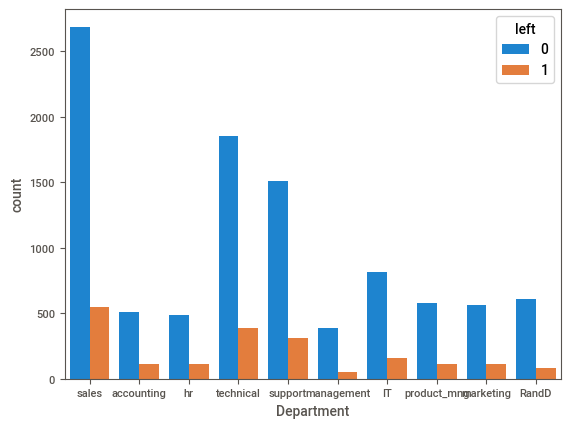

In [19]:
sns.countplot(x = data.Department, hue = data.left)

* In this Department the employees in sales department are left the company

### Salary VS Left

<AxesSubplot:xlabel='salary', ylabel='count'>

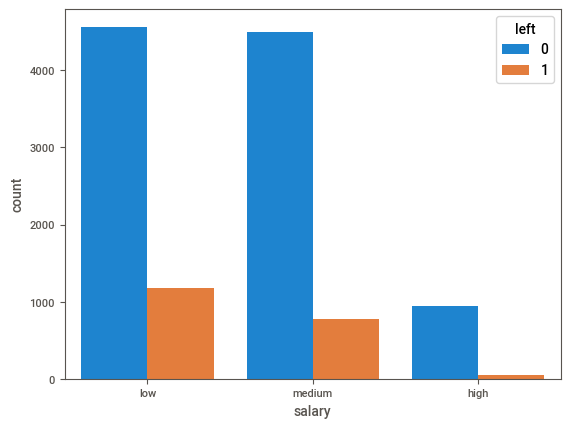

In [20]:
sns.countplot(x=data.salary,hue=data.left)

* In salary the employees who are having low salary are highly left the company.

# Data Preprocessing

### Step 1 : Finding missing values


In [21]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Step 2 : Converting Categorical data to numerical data


### Department

In [23]:
data.Department.value_counts()


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

In [24]:
data.Department=data.Department.map({'sales':9,'technical':8,'support':7,'IT':6,'RandD':5,'product_mng':4,'marketing':3,'accounting':2,'hr':1,'management':0})

In [25]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,9,low
1,0.80,0.86,5,262,6,0,1,0,9,medium
2,0.11,0.88,7,272,4,0,1,0,9,medium
3,0.72,0.87,5,223,5,0,1,0,9,low
4,0.37,0.52,2,159,3,0,1,0,9,low


In [26]:
data['Department'].dtype

dtype('int64')

### Salary

In [27]:
data.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [28]:
## Encoding salary
data['salary'] = data['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)


In [29]:
data.salary

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary, Length: 11991, dtype: int32

In [30]:
data.left.unique()

array([1, 0], dtype=int64)

## checking Outliers

In [31]:
data_box=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'Department','salary']]

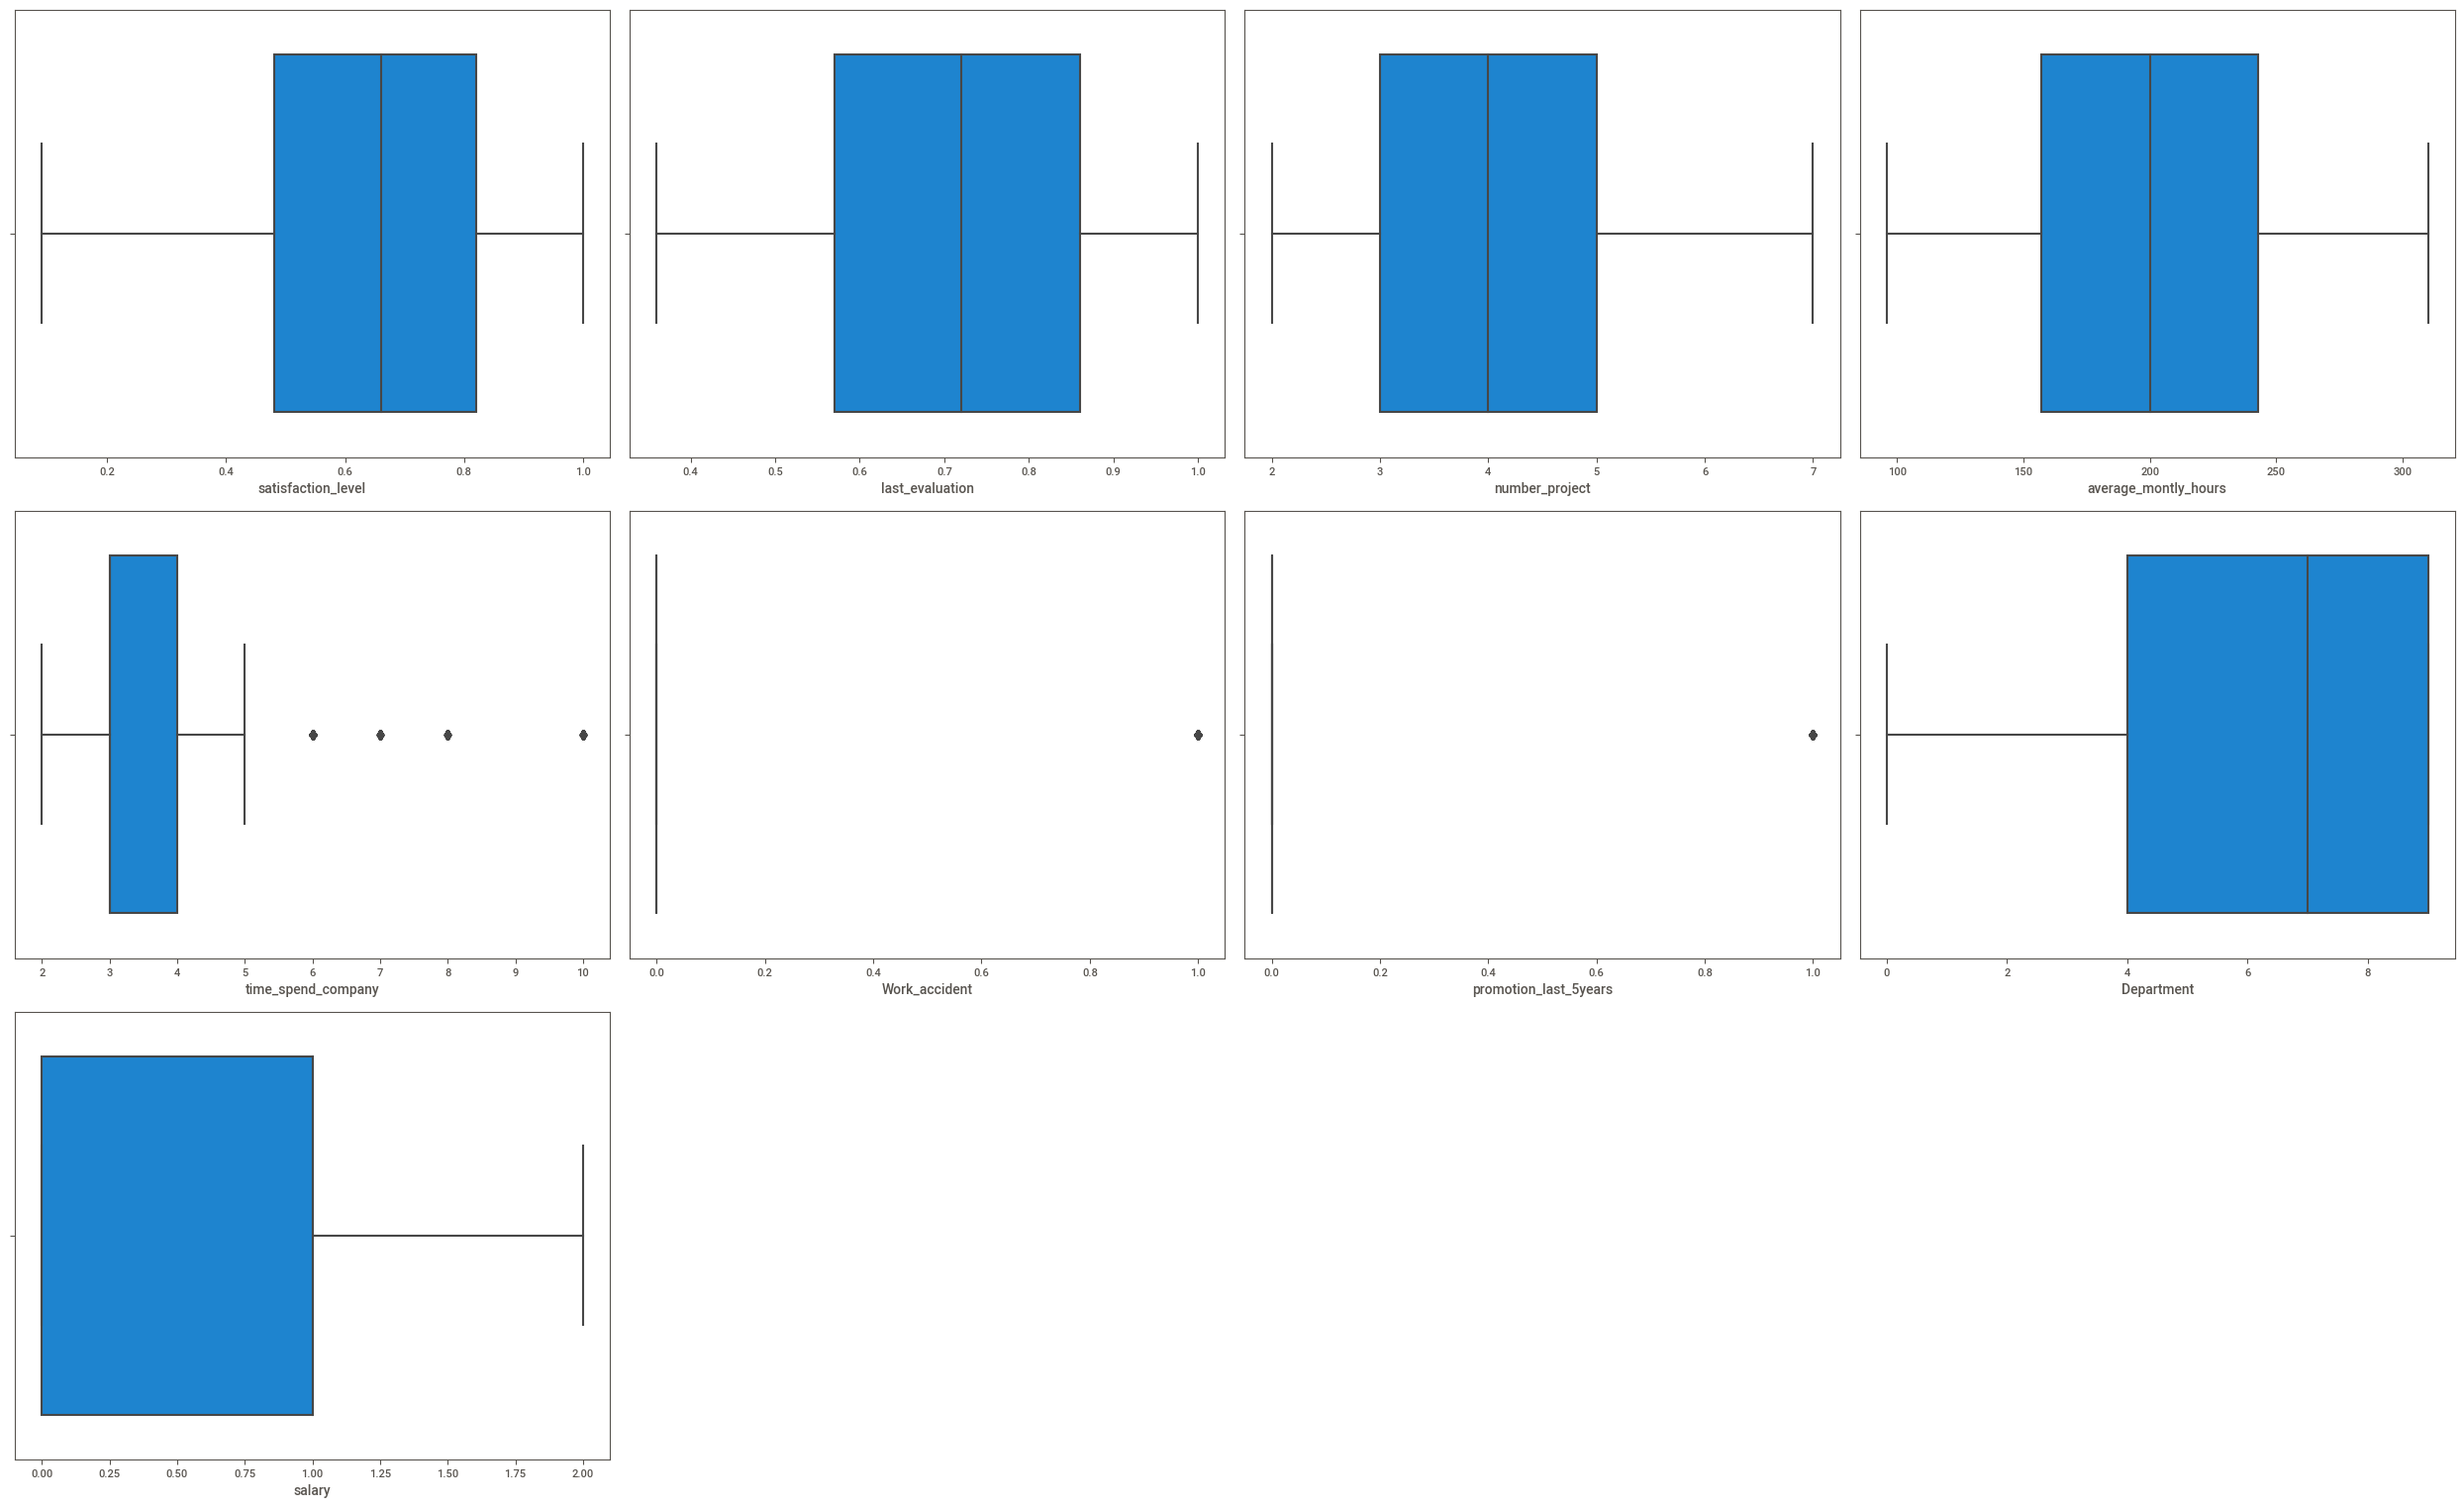

In [32]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data_box:
    if plotnumber<=9 :
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
       
    plotnumber+=1
plt.tight_layout()

In [33]:
data.left.unique()

array([1, 0], dtype=int64)

In [34]:
from scipy import stats             #importing stats for scipy library


###### time_spend_company

In [35]:
IQR=stats.iqr(data.time_spend_company,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [36]:
Q1=data.time_spend_company.quantile(0.25)   #defining 25% of data
Q1

3.0

In [37]:
Q3=data.time_spend_company.quantile(0.75)   #defining 75% of data
Q3

4.0

In [38]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

1.5

In [39]:
max_limit=Q1+1.5*IQR              #setting maxmum limit
max_limit

4.5

In [40]:
data.loc[data['time_spend_company']<min_limit]         #checking values which are less than minimum limit


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [41]:
data.loc[data['time_spend_company']>max_limit]         #checking values which are less than maximum limit


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,9,1
3,0.72,0.87,5,223,5,0,1,0,9,0
7,0.92,0.85,5,259,5,0,1,0,9,0
8,0.89,1.00,5,224,5,0,1,0,9,0
12,0.84,0.92,4,234,5,0,1,0,9,0
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,0,2
11995,0.90,0.55,3,259,10,1,0,1,0,2
11996,0.74,0.95,5,266,10,0,0,1,0,2
11997,0.85,0.54,3,185,10,0,0,1,0,2


In [42]:
import numpy as np

max_limit = 10  # Example value for the maximum limit

# Assuming 'data' is your DataFrame

# Impute values in 'time_spend_company' column greater than max_limit with the median
data.loc[data['time_spend_company'] > max_limit, 'time_spend_company'] = np.median(data['time_spend_company'])




In [43]:
data.time_spend_company=np.sqrt(data.time_spend_company)


## Scaling the data

### Feature Selection

In [44]:
# 1. Dropping Unwanted Columns

In [45]:
data.left.unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

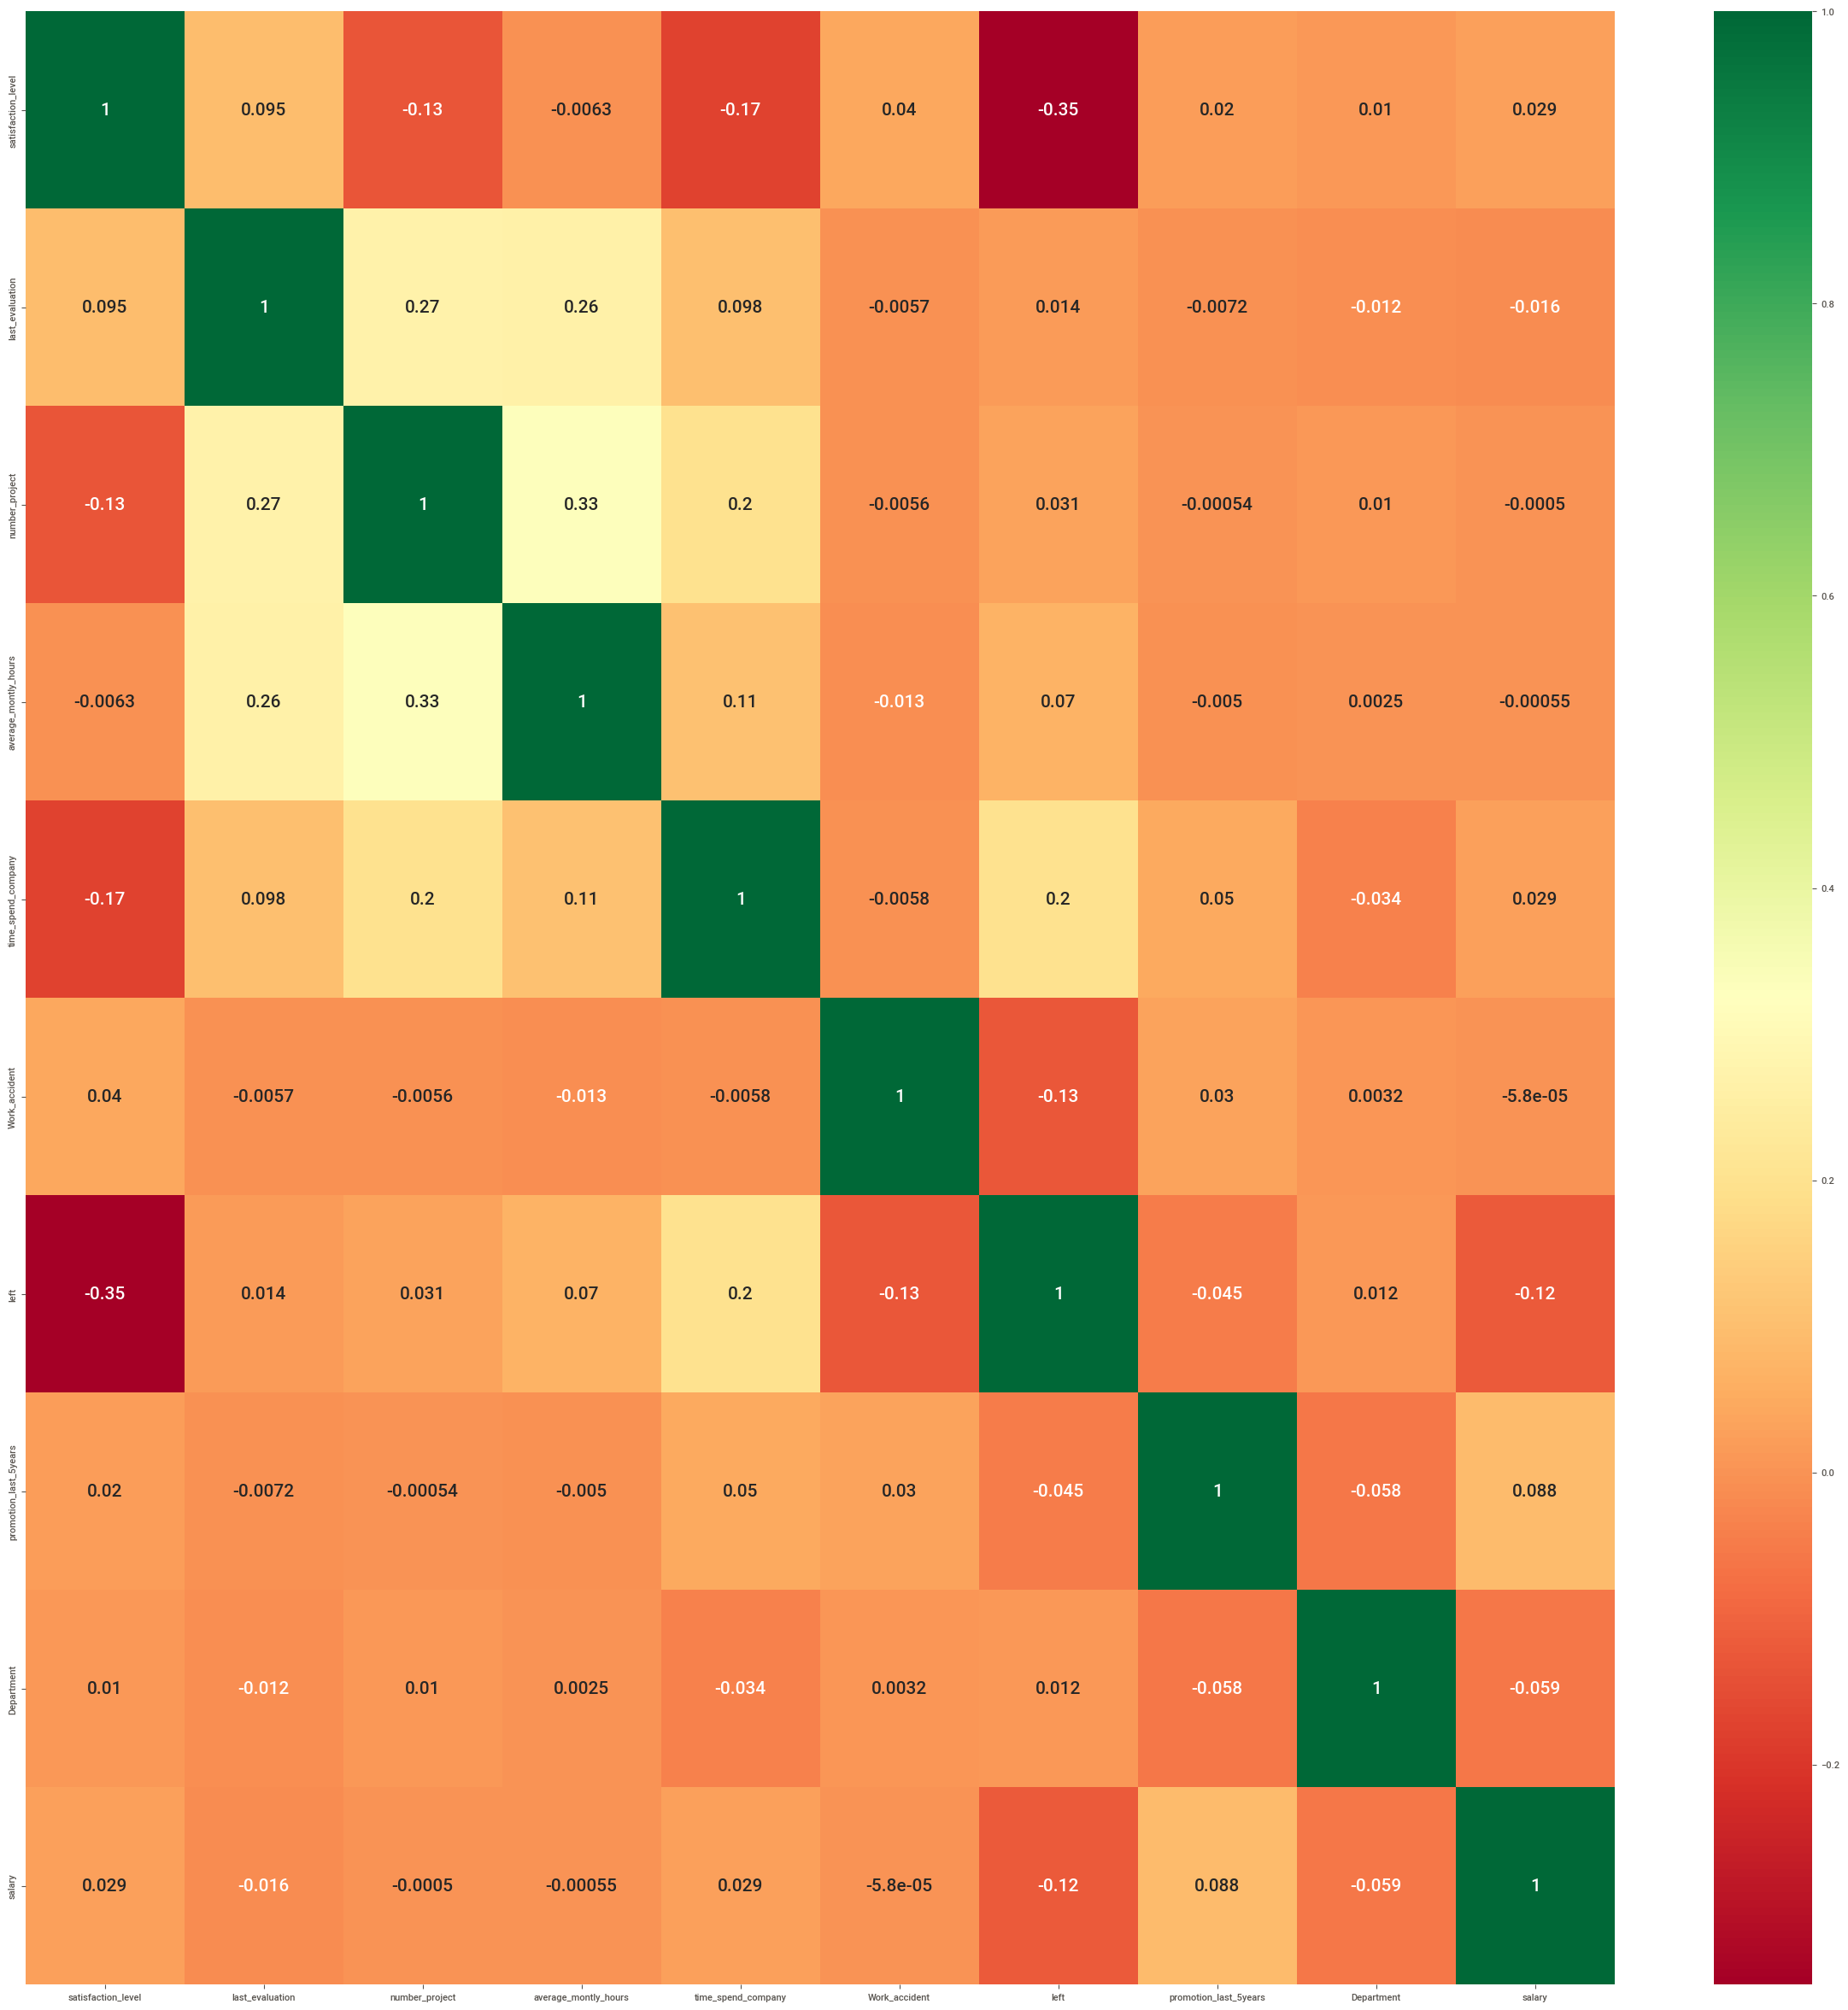

In [46]:
# 2. checking for correlation

plt.figure(figsize=(30,30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [47]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,1.804120,0.154282,0.166041,0.016929,6.319907,0.60387
std,0.241070,0.168343,1.163238,48.727813,0.331690,0.361234,0.372133,0.129012,2.722544,0.63590
min,0.090000,0.360000,2.000000,96.000000,1.414214,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,1.732051,0.000000,0.000000,0.000000,4.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,1.732051,0.000000,0.000000,0.000000,7.000000,1.00000
75%,0.820000,0.860000,5.000000,243.000000,2.000000,0.000000,0.000000,0.000000,9.000000,1.00000
max,1.000000,1.000000,7.000000,310.000000,3.162278,1.000000,1.000000,1.000000,9.000000,2.00000


## Model Creation

In [48]:
x=data.drop('left',axis=1)
y=data.left

In [49]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,1.732051,0,0,9,0
1,0.80,0.86,5,262,2.449490,0,0,9,1
2,0.11,0.88,7,272,2.000000,0,0,9,1
3,0.72,0.87,5,223,2.236068,0,0,9,0
4,0.37,0.52,2,159,1.732051,0,0,9,0
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,3.162278,1,1,0,2
11996,0.74,0.95,5,266,3.162278,0,1,0,2
11997,0.85,0.54,3,185,3.162278,0,1,0,2
11998,0.33,0.65,3,172,3.162278,0,1,3,2


In [50]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
scaled_data

array([[-1.03566801, -1.10899046, -1.54992118, ..., -0.13122844,
         0.98444874, -0.94966952],
       [ 0.70663718,  0.85137984,  1.02919412, ..., -0.13122844,
         0.98444874,  0.62297062],
       [-2.15572134,  0.97019016,  2.74860432, ..., -0.13122844,
         0.98444874,  0.62297062],
       ...,
       [ 0.91405447, -1.0495853 , -0.69021608, ...,  7.62029957,
        -2.32142061,  2.19561075],
       [-1.24308529, -0.39612853, -0.69021608, ...,  7.62029957,
        -1.21946416,  2.19561075],
       [-0.53786652,  0.07911275,  0.16948902, ..., -0.13122844,
        -0.11750771, -0.94966952]])

In [52]:
from sklearn.model_selection import train_test_split                    #importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.25,random_state=42)  

In [53]:
x_train

array([[-0.33044924,  0.01970759, -0.69021608, ..., -0.13122844,
        -2.32142061, -0.94966952],
       [ 0.4992199 ,  0.37613856, -0.69021608, ..., -0.13122844,
         0.61712992,  0.62297062],
       [-0.28896578,  0.25732823, -0.69021608, ..., -0.13122844,
         0.2498111 ,  0.62297062],
       ...,
       [ 0.87257101, -1.10899046,  1.02919412, ..., -0.13122844,
         0.61712992,  0.62297062],
       [-0.82825072, -1.40601626, -1.54992118, ..., -0.13122844,
         0.98444874, -0.94966952],
       [-0.70380035, -1.82185239,  1.88889922, ..., -0.13122844,
         0.98444874, -0.94966952]])

In [54]:
x_test

array([[-2.23868826,  0.43554372,  1.88889922, ..., -0.13122844,
         0.98444874, -0.94966952],
       [ 0.45773644,  1.44543145,  0.16948902, ..., -0.13122844,
         0.2498111 ,  0.62297062],
       [ 0.74812064,  1.50483661,  0.16948902, ..., -0.13122844,
         0.98444874, -0.94966952],
       ...,
       [ 0.91405447,  0.19792307,  0.16948902, ..., -0.13122844,
         0.98444874, -0.94966952],
       [ 1.16295521, -0.57434402,  1.02919412, ..., -0.13122844,
        -2.32142061,  0.62297062],
       [-0.49638307, -0.57434402, -0.69021608, ..., -0.13122844,
         0.2498111 , -0.94966952]])

In [55]:
y_train

4259     0
6219     0
7000     0
8908     0
11984    0
        ..
11973    0
5200     0
5399     0
861      1
7279     0
Name: left, Length: 8993, dtype: int64

In [56]:
y_test

397     1
3107    0
9331    0
357     1
1326    1
       ..
7337    0
376     1
2467    0
6014    0
6152    0
Name: left, Length: 2998, dtype: int64

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8993, 9)
(8993,)
(2998, 9)
(2998,)


In [58]:
# Checking for imbalanced data
data.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [59]:
#smoting
from imblearn.over_sampling import SMOTE
smote=SMOTE()           #creating object for smote

In [60]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)       #fitting the training data to overcome imbalancing


In [61]:
from collections import Counter          #importing counter
print('Actual Classes',Counter(y_train))    #printing actual classes
print('Smote Classes',Counter(y_smote))       #printing smote classes

Actual Classes Counter({0: 7499, 1: 1494})
Smote Classes Counter({0: 7499, 1: 7499})


In [62]:
y_smote.value_counts()                #checking if the data is balanced or not


0    7499
1    7499
Name: left, dtype: int64

* We conduct our experiment by implementing the following classification models:
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. GB Classifier
6. XGB Classifier
7. ANN Classifier

## Model Creation

## Logistic Regression

In [63]:

from sklearn.linear_model import LogisticRegression              #importing logistic regression
LR=LogisticRegression()                         #object creation for logistic regression
LR.fit(x_smote,y_smote)

LogisticRegression()

In [64]:
y_train_pred=LR.predict(x_smote)    # passing x_train to predict y_tain

In [65]:
y_pred=LR.predict(x_test)               #predicting x_test data
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [66]:
# Evaluation metrics for Linear Regression

In [67]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix

In [68]:
# Training scores

In [69]:
acc_train=accuracy_score(y_smote,y_train_pred)     # Checking accuracy
acc_train

0.8043739165222029

In [70]:
print(classification_report(y_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      7499
           1       0.78      0.85      0.81      7499

    accuracy                           0.80     14998
   macro avg       0.81      0.80      0.80     14998
weighted avg       0.81      0.80      0.80     14998



In [71]:
# Testing Scores

In [72]:
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.7838559039359573

In [73]:
pd.crosstab(y_test,y_pred)          # Confusion matrix for Logistic regression

col_0,0,1
left,,
0,1930,571
1,77,420


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2501
           1       0.42      0.85      0.56       497

    accuracy                           0.78      2998
   macro avg       0.69      0.81      0.71      2998
weighted avg       0.87      0.78      0.81      2998



In [75]:
print("Train accuracy for LR :",accuracy_score(y_smote,y_train_pred))
print("Test accuracy for LR :",accuracy_score(y_test,y_pred))

Train accuracy for LR : 0.8043739165222029
Test accuracy for LR : 0.7838559039359573


## SVM

In [76]:
from sklearn.svm import SVC                 #importing svc
svclassifier=SVC()                          #base model with default parameters
svclassifier.fit(x_smote,y_smote)           #fitting smoting data

SVC()

In [77]:
y_hat=svclassifier.predict(x_test)          #predicting x_test data
y_hat

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_train_predict=svclassifier.predict(x_smote)
y_train_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
# # Evaluation Metrics for SVM Classifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix

In [80]:
# Training Scores

In [81]:
acc_train1=accuracy_score(y_smote,y_train_predict)
acc_train1

0.9575943459127884

In [82]:
print(classification_report(y_smote,y_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7499
           1       0.97      0.94      0.96      7499

    accuracy                           0.96     14998
   macro avg       0.96      0.96      0.96     14998
weighted avg       0.96      0.96      0.96     14998



In [83]:
# Testing Scores

In [84]:
acc_test1=accuracy_score(y_test,y_hat)
acc_test1

0.9613075383589059

In [85]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2501
           1       0.87      0.90      0.89       497

    accuracy                           0.96      2998
   macro avg       0.93      0.94      0.93      2998
weighted avg       0.96      0.96      0.96      2998



In [86]:
pd.crosstab(y_test,y_hat)          # Confusion matrix for svm

col_0,0,1
left,,
0,2434,67
1,49,448


In [87]:
print("Train accuracy for SVM :",accuracy_score(y_smote,y_train_predict))
print("Test accuracy for SVM :",accuracy_score(y_test,y_hat))

Train accuracy for SVM : 0.9575943459127884
Test accuracy for SVM : 0.9613075383589059


## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier     #importing decision tree classifier
dt=DecisionTreeClassifier()                  #creating an object for decision tree
dt.fit(x_smote,y_smote)                      #fitting the training data


DecisionTreeClassifier()

In [89]:
y_hat1=dt.predict(x_test)                 #predicting the testing data
y_hat1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [90]:
y_train_predict1=svclassifier.predict(x_smote)
y_train_predict1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
# # Evaluation Metrics for SVM Classifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix

In [92]:
# Training scores

In [93]:
acc_train2=accuracy_score(y_smote,y_train_predict1)
acc_train2

0.9575943459127884

In [94]:
print(classification_report(y_smote,y_train_predict1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7499
           1       0.97      0.94      0.96      7499

    accuracy                           0.96     14998
   macro avg       0.96      0.96      0.96     14998
weighted avg       0.96      0.96      0.96     14998



In [95]:
# Testing Scores

In [96]:
acc_test2=accuracy_score(y_test,y_hat1)
acc_test2

0.9689793195463643

In [97]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2501
           1       0.90      0.91      0.91       497

    accuracy                           0.97      2998
   macro avg       0.94      0.95      0.94      2998
weighted avg       0.97      0.97      0.97      2998



In [98]:
pd.crosstab(y_test,y_hat1)          # Confusion matrix for DT

col_0,0,1
left,,
0,2452,49
1,44,453


In [99]:
print("Train accuracy for DT :",accuracy_score(y_smote,y_train_predict1))
print("Test accuracy for DT :",accuracy_score(y_test,y_hat1))

Train accuracy for DT : 0.9575943459127884
Test accuracy for DT : 0.9689793195463643


## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier      # Importing random forest classifier
rf_clf=RandomForestClassifier(n_estimators=100)          # Creating a object for random forest classifier
rf_clf.fit(x_smote,y_smote)                              # Fitting traing data

RandomForestClassifier()

In [101]:
y_hat2=rf_clf.predict(x_test)                 #predicting the testing data
y_hat2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
y_train_predict2=rf_clf.predict(x_smote)
y_train_predict2

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [103]:
# # Evaluation Metrics for SVM Classifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix

In [104]:
# Training Scores

In [105]:
acc_train3=accuracy_score(y_smote,y_train_predict2)
acc_train3

1.0

In [106]:
print(classification_report(y_smote,y_train_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7499
           1       1.00      1.00      1.00      7499

    accuracy                           1.00     14998
   macro avg       1.00      1.00      1.00     14998
weighted avg       1.00      1.00      1.00     14998



In [107]:
# Testing Scores

In [108]:
acc_test3=accuracy_score(y_test,y_hat2)
acc_test3

0.9803202134756505

In [109]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.90      0.94       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



In [110]:
pd.crosstab(y_test,y_hat2)          # Confusion matrix for RF

col_0,0,1
left,,
0,2490,11
1,48,449


In [111]:
print("Train accuracy for RF :",accuracy_score(y_smote,y_train_predict2))
print("Test accuracy for RF :",accuracy_score(y_test,y_hat2))

Train accuracy for RF : 1.0
Test accuracy for RF : 0.9803202134756505


## GB Classifier

In [112]:
from sklearn.ensemble import GradientBoostingClassifier            # Importing GB cassifier
gbm=GradientBoostingClassifier()                                   # Object creation for GB Classifier
gbm.fit(x_smote,y_smote)                                           # Fitting the data

GradientBoostingClassifier()

In [113]:
y_gbm=gbm.predict(x_test)
y_gbm

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
y_gbm1=gbm.predict(x_smote)
y_gbm1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [115]:
# Evaluation Metrics for GB Classifier

In [116]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,precision_score    # to check model performance


In [117]:
# training scores

In [118]:
acc_train4=accuracy_score(y_smote,y_gbm1)
acc_train4

0.974996666222163

In [119]:
print(classification_report(y_smote,y_gbm1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7499
           1       0.98      0.97      0.97      7499

    accuracy                           0.97     14998
   macro avg       0.98      0.97      0.97     14998
weighted avg       0.98      0.97      0.97     14998



In [120]:
# Testing Scores

In [121]:
acc_test4=accuracy_score(y_test,y_gbm)
acc_test4

0.9729819879919946

In [122]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2501
           1       0.92      0.92      0.92       497

    accuracy                           0.97      2998
   macro avg       0.95      0.95      0.95      2998
weighted avg       0.97      0.97      0.97      2998



In [123]:
pd.crosstab(y_test,y_gbm)          # Confusion matrix for gbm

col_0,0,1
left,,
0,2462,39
1,42,455


In [124]:
print("Train accuracy for GB :",accuracy_score(y_smote,y_gbm1))
print("Test accuracy for GB :",accuracy_score(y_test,y_gbm))

Train accuracy for GB : 0.974996666222163
Test accuracy for GB : 0.9729819879919946


## XGB Classifier

In [125]:
from xgboost import XGBClassifier           # Importing XGBClasiifier
xgb_c=XGBClassifier()                       # object creation for XGBClassifier
xgb_c.fit(x_smote,y_smote)                  # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [126]:
y_train_predict3=xgb_c.predict(x_smote)
y_train_predict3

array([0, 0, 0, ..., 1, 1, 1])

In [127]:
y_hat3=xgb_c.predict(x_test)                 #predicting the testing data
y_hat3

array([1, 0, 0, ..., 0, 0, 0])

In [128]:
# Evaluation Metrics for XGB Classifier

In [129]:
acc_train5=accuracy_score(y_smote,y_train_predict3)
acc_train5

0.9975996799573277

In [130]:
print(classification_report(y_smote,y_train_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7499
           1       1.00      1.00      1.00      7499

    accuracy                           1.00     14998
   macro avg       1.00      1.00      1.00     14998
weighted avg       1.00      1.00      1.00     14998



In [131]:
acc_test5=accuracy_score(y_test,y_hat3)
acc_test5

0.9796531020680453

In [132]:
pr=precision_score(y_test,y_hat3)
pr

0.9658119658119658

In [133]:
print(classification_report(y_test,y_hat3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2501
           1       0.97      0.91      0.94       497

    accuracy                           0.98      2998
   macro avg       0.97      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



In [134]:
pd.crosstab(y_test,y_hat3)          # Confusion matrix for xgb

col_0,0,1
left,,
0,2485,16
1,45,452


In [135]:
print("Train accuracy for XGB :",accuracy_score(y_smote,y_train_predict3))
print("Test accuracy for XGB :",accuracy_score(y_test,y_hat3))

Train accuracy for XGB : 0.9975996799573277
Test accuracy for XGB : 0.9796531020680453


## ANN

In [136]:
from sklearn.neural_network import MLPClassifier      # importing ANN Classifier
model = MLPClassifier(hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=42)
# model creation max_iter = stopping parameter
model.fit(x_smote,y_smote)

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
              random_state=42)

In [137]:
y_predict_proba=model.predict_proba(x_test)     # predicting the probability of class
y_predict_proba

array([[6.98163639e-03, 9.93018364e-01],
       [9.67335915e-01, 3.26640850e-02],
       [9.99984860e-01, 1.51398974e-05],
       ...,
       [9.99915255e-01, 8.47448809e-05],
       [9.99998963e-01, 1.03725887e-06],
       [1.00000000e+00, 1.43344085e-10]])

In [138]:

y_predict=model.predict(x_test)             # Predicting x_test data
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
y_train_predict=model.predict(x_smote)       # predicting x_train data
y_train_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [140]:
# Evaluation Metrics of ANN Classifier

In [141]:
print(classification_report(y_test,y_predict))      # classification_report of ANN Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2501
           1       0.87      0.89      0.88       497

    accuracy                           0.96      2998
   macro avg       0.92      0.93      0.93      2998
weighted avg       0.96      0.96      0.96      2998



In [142]:
pd.crosstab(y_test,y_predict)          # Confusion matrix for ANN Classifier

col_0,0,1
left,,
0,2436,65
1,55,442


In [143]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_smote,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.966395519402587
Test accuracy : 0.9599733155436958


# Results

In [144]:
## Comparision Table of Training Models

In [145]:
from prettytable import PrettyTable

In [146]:
x=PrettyTable()

In [ ]:
x.fields_names = ["Model","accuracy_score"]

In [147]:
x.add_row(["Logistic Regression","78%"])
x.add_row(["SVM Classifier","96%"])
x.add_row(["Decision Tree","97%"])
x.add_row(["Random Forest Classifier","98%"])
x.add_row(["GB Classifier","97%"])
x.add_row(["XGB Classifier","98%"])
x.add_row(["ANN Classifier","96%"])

In [148]:
print(x)

+--------------------------+---------+
|         Field 1          | Field 2 |
+--------------------------+---------+
|   Logistic Regression    |   78%   |
|      SVM Classifier      |   96%   |
|      Decision Tree       |   97%   |
| Random Forest Classifier |   98%   |
|      GB Classifier       |   97%   |
|      XGB Classifier      |   98%   |
|      ANN Classifier      |   96%   |
+--------------------------+---------+


### Conclusion
* Here we are having Random Forest Classifier,XGB Classifier with 98% accuracy .
* Followed by Decision Tree, GB Classifier with 97% accuracy .
* And  SVM Classifier and ANN Classifier with 96% accuracy .
* Finally , Logistic Regression as low accuracy of 78% .